# <b>Lec02. EDA : Bike Sharing Demand
* https://www.kaggle.com/competitions/bike-sharing-demand/data

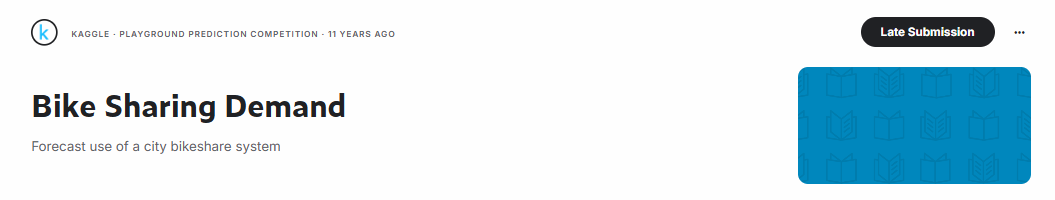

* 평가 메트릭스 RMSLE = $\sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# <b>Data Load

In [2]:
train  = pd.read_csv("./data/bike/train.csv" , parse_dates=['datetime'])
test   = pd.read_csv("./data/bike/test.csv"  , parse_dates=['datetime'])
submit = pd.read_csv("./data/bike/sampleSubmission.csv")

## 피쳐명 리네임

In [3]:
train.rename(columns={'datetime': 'rdate'} , inplace=True)
test.rename(columns={'datetime': 'rdate'}  , inplace=True)

## 구조 : info()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rdate       10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## <b><font size=5 color=red><b>날짜 타입 캐스팅 ★★★★

###  df['컬럼'].astype('datetime64[ns]')

In [5]:
#train['rdate'] = train['rdate'].astype('datetime64[ns]')

### pd.to_datetime(df['컬럼'] , format='')

In [6]:
# train['rdate'] = pd.to_datetime(train['rdate'] , format='%Y-%m-%d %H:%M:%S')

### pd.read_csv( parse_dates=['컬럼'...])

In [7]:
# traincp  = pd.read_csv("./datas/bike/train.csv", parse_dates=['datetime'])
# traincp.info()

## 크기 : shape

In [8]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [9]:
train.head(2)

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [10]:
test.head(2)

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [11]:
submit.head(2)

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0


## traget
* casual + registered = count

In [12]:
#train [ train['count'] > 2 ]

In [13]:
train[  train['casual'] + train['registered'] !=  train['count'] ]

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


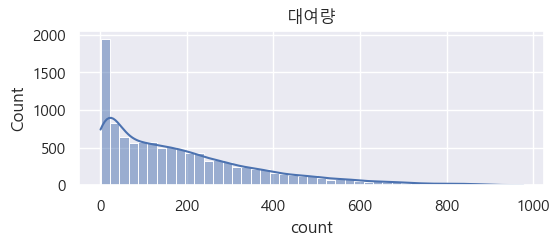

In [14]:
plt.figure(figsize=(6, 2))
sns.histplot(x="count", data=train, kde=True)
plt.title("대여량")
plt.show() 

# <B> EDA

## 히스토그램

<Figure size 1600x800 with 0 Axes>

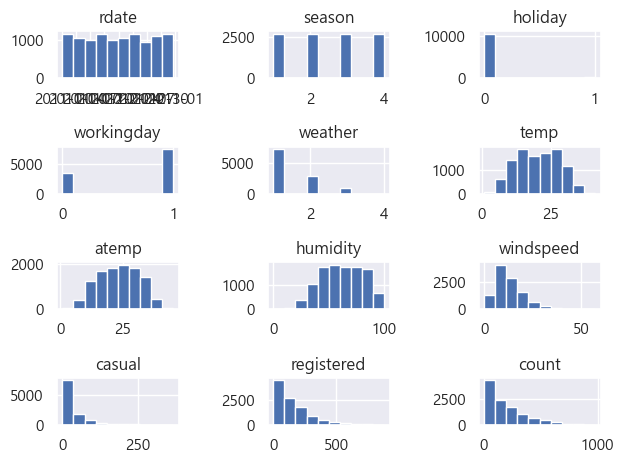

In [15]:
plt.figure(figsize=(16,8))
train.hist()
plt.tight_layout()
plt.show()

## <font color=red><b>set_index('rdate') , reset_index()

In [16]:
traincp = train.copy()

In [17]:
traincp = traincp.set_index('rdate')
traincp.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
rdate,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [18]:
traincp = traincp.reset_index()
traincp.head(2)

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [19]:
train.head(2)

,rdate,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


## rdate
* <font color=red><b>반드시 dtype이 datetime이어야 한다.

In [20]:
train['year']    = train['rdate'].dt.year
train['month']   = train['rdate'].dt.month
train['day']     = train['rdate'].dt.day
train['hour']    = train['rdate'].dt.hour
train['weekday'] = train['rdate'].dt.weekday   # 월=0 ~ 일=6  weekday == dayofweek

#-------------------------------------------------
test['year']    = test['rdate'].dt.year
test['month']   = test['rdate'].dt.month
test['day']     = test['rdate'].dt.day
test['hour']    = test['rdate'].dt.hour
test['weekday'] = test['rdate'].dt.weekday   # 월=0 ~ 일=6  weekday == dayofweek


In [21]:
train = train.set_index('rdate')
# -------------------------
test = test.set_index('rdate')

In [22]:
train.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
rdate,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5


##  train , test 분포도 

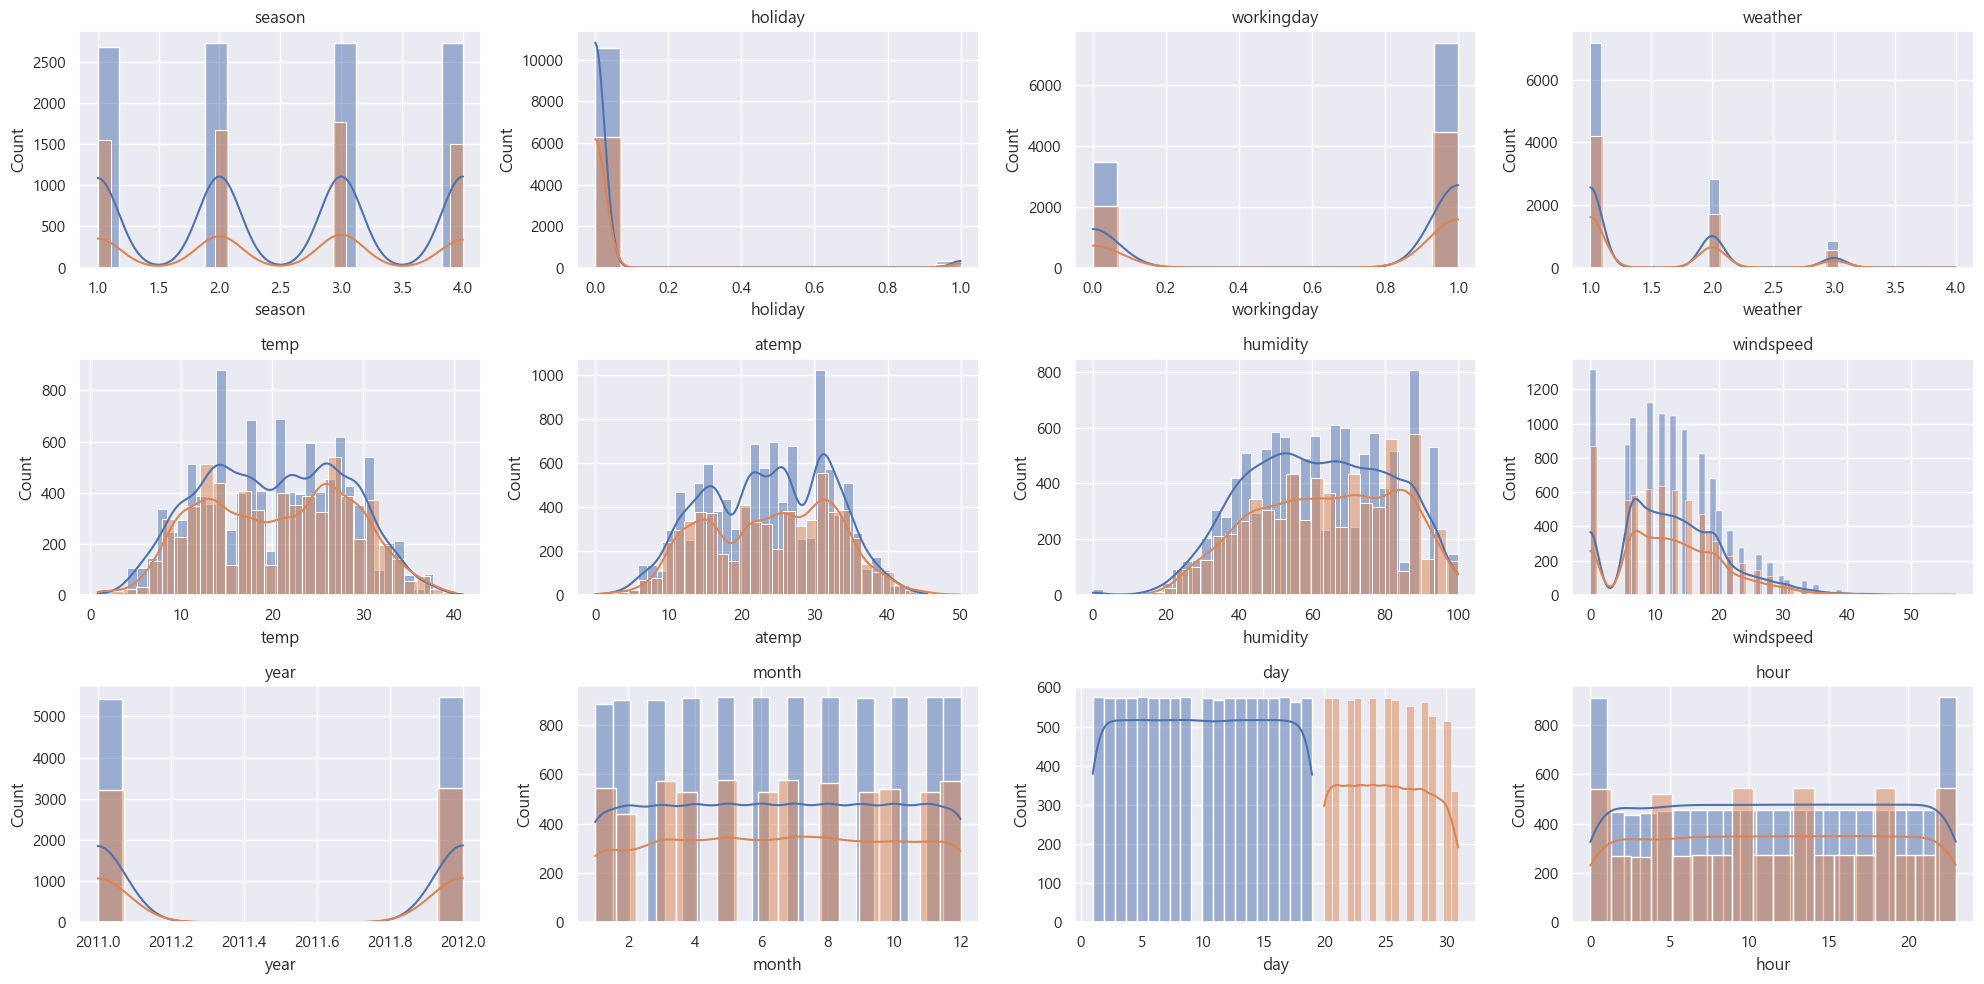

In [23]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10)  )

col_list = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','year', 'month', 'day','hour']
for i, col in enumerate(col_list) :  #train.columns) :
    r = i//4
    c = i%4
    #print(i,r, c ,col)
    axes[r][c].set_title(col)
    sns.histplot(data=train, x=col, ax=axes[r][c],     kde=True )
    sns.histplot(data=test , x=col, ax=axes[r][c],     kde=True )
  
plt.tight_layout()
plt.show()

## <b><font size=5 color=red>상관분석 ★★★★★★★★

* 변수간 상관관계

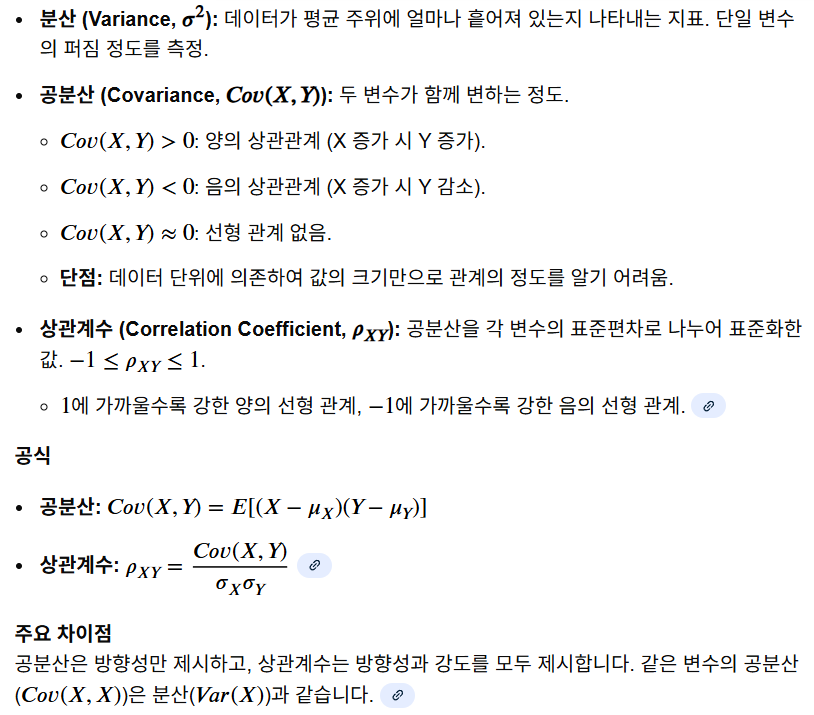

## <b>다중공선성(Multicollinearity) ★★★★★★★★

<pre><b><font size=5 color=red>약  (0.3~0.7은 보통)   강
    
    회귀 분석에서 독립 변수들 간에 강한 선형 상관관계로 모델 불안정
    강한 상관관계 > 0.9  
    1) 둘 중 하나는 버려라
    2) 둘을 합쳐라
    3) 주성분 분석(PCA: Principal Component Analysis)) : 차원축소

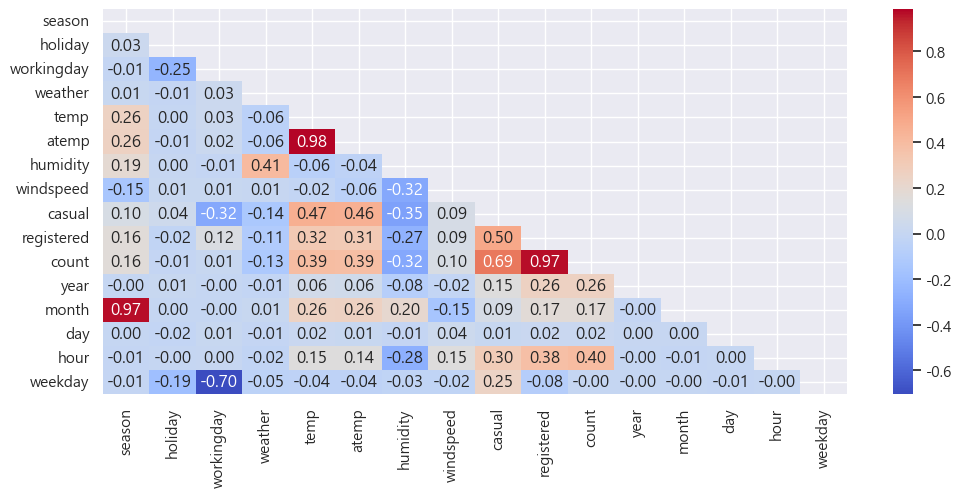

In [24]:
plt.figure(figsize=(12, 5))
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
sns.heatmap(train.corr(), annot=True, fmt=".2f", mask=mask, cmap='coolwarm')     #---------------------------- sns 히트맵
plt.show()

* temp atemp : 다중공선 drop
* casual + registered = count : 다중공선
* weekday(파생) , workingday(기존) : 강한 상관관계 ---  weekday drop
* holiday, workingday : 관계

In [25]:
train['year'].value_counts()

year
2012    5464
2011    5422
Name: count, dtype: int64

In [26]:
train.groupby(by="month")['count'].sum()

month
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

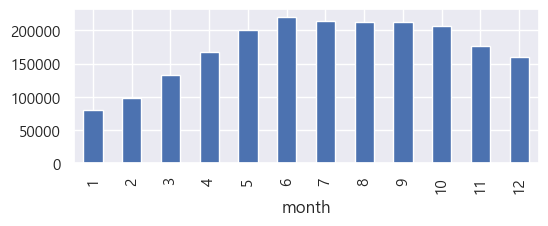

In [27]:
plt.figure(figsize=(6,2))
train.groupby(by="month")['count'].sum().sort_index().plot(kind='bar')
plt.show()

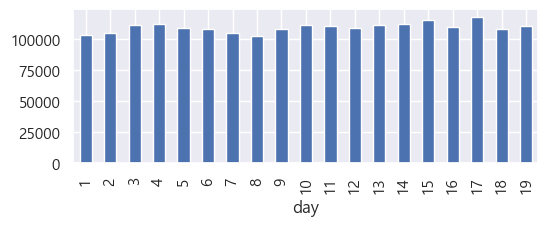

In [28]:
plt.figure(figsize=(6,2))
train.groupby(by="day")['count'].sum().sort_index().plot(kind='bar')
plt.show()

In [29]:
train['day'].unique()  , test['day'].unique()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19], dtype=int32),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], dtype=int32))

## 날짜 관련
* 'season', 'year', 'month', 'hour', 'weekday', ('day')

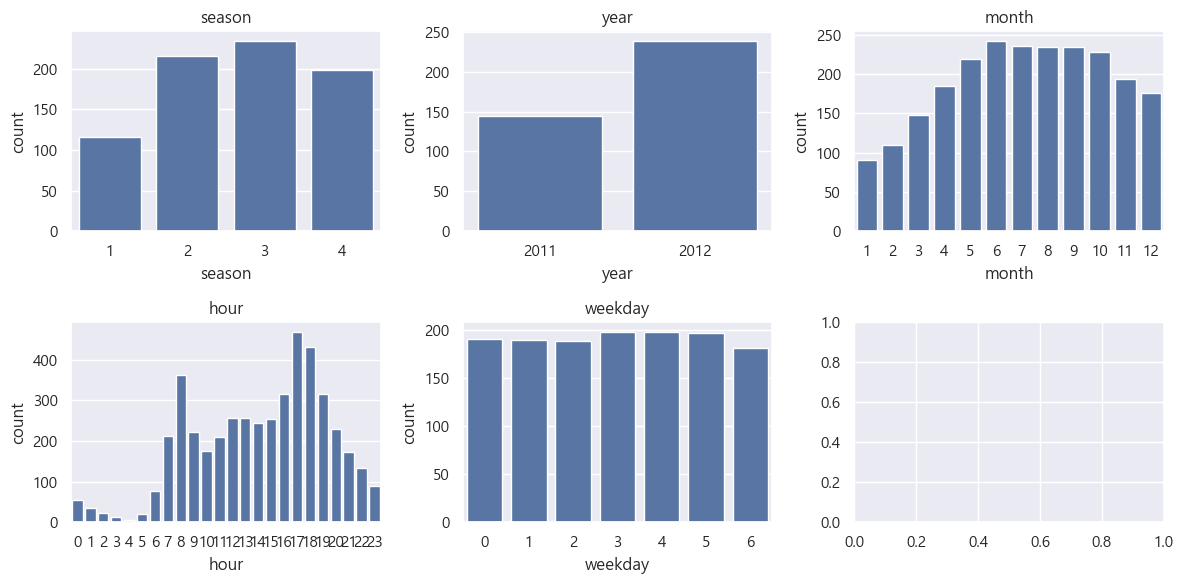

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(12, 6)  )
col_list = ['season', 'year', 'month', 'hour', 'weekday']
for i, col in enumerate(col_list) : 
    r = i//3
    c = i%3
    axes[r][c].set_title(col)
    sns.barplot(data=train, x=col, y='count', ax=axes[r][c],  ci=None )
    
plt.tight_layout()
plt.show()

## 날씨 관련
* 'weather', 'temp', 'atemp', 'humidity', 'windspeed'

<pre>weather 
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [31]:
# plt.figure(figsize=(6, 2))
# sns.lineplot(x="hour", y="count", hue="weather", data=train)
# plt.title('weather')
# plt.show()

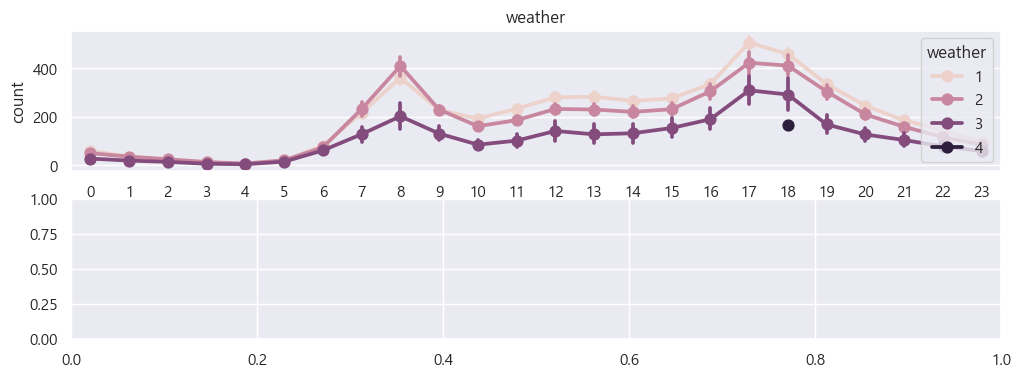

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(12, 4)  )

sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=axes[0])
axes[0].set(title="weather")

# sns.pointplot(data=train, x='hour', y='count', hue='temp', ax=axes[1])
# axes[1].set(title="temp")

# sns.pointplot(data=train, x='hour', y='count', hue='humidity', ax=axes[2])
# axes[2].set(title="humidity")

# sns.pointplot(data=train, x='hour', y='count', hue='windspeed', ax=axes[2])
# axes[3].set(title="windspeed")
plt.show()

* 이중축

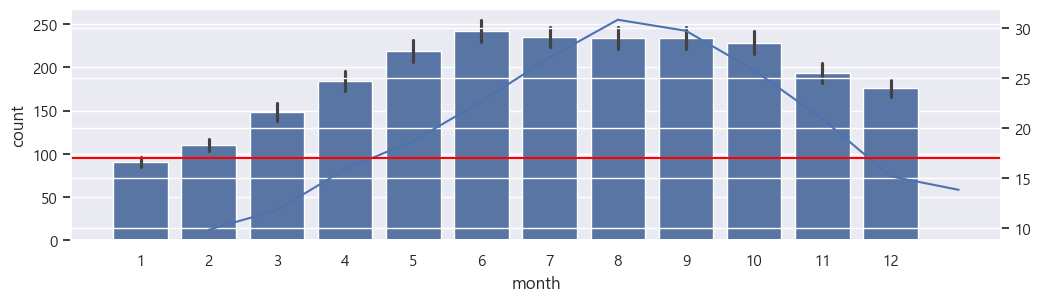

In [33]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="month", y="count", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("month")[['temp']].mean() )
axes2.axhline(y=17, color='red', linestyle='-')
plt.show()

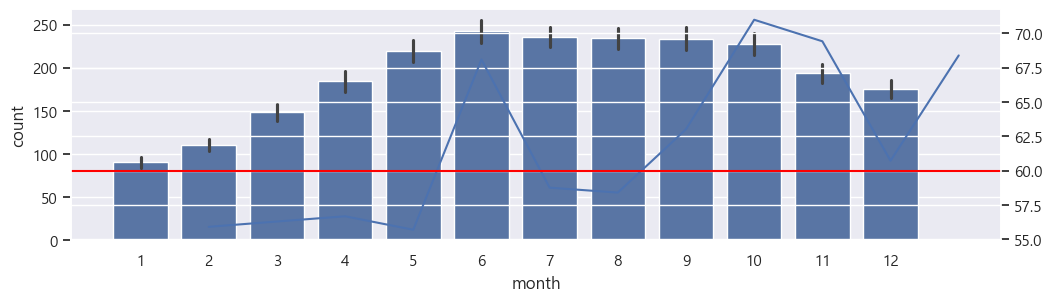

In [34]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="month", y="count", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("month")[['humidity']].mean() )

axes2.axhline(y=60, color='red', linestyle='-')

plt.show()

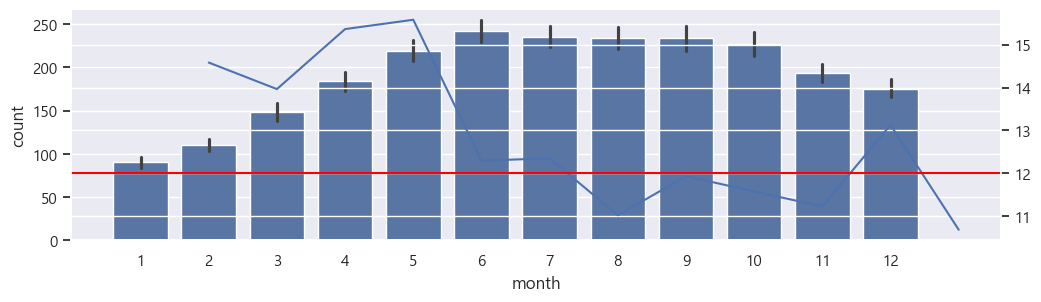

In [35]:
fig, axes = plt.subplots(figsize=(12,3))
sns.barplot(data=train, x="month", y="count", ax=axes)

axes2 = axes.twinx()
axes2.plot(train.groupby("month")[['windspeed']].mean() )

axes2.axhline(y=12, color='red', linestyle='-')

plt.show()

## 예약 관련
* 'casual', 'registered', 'count',

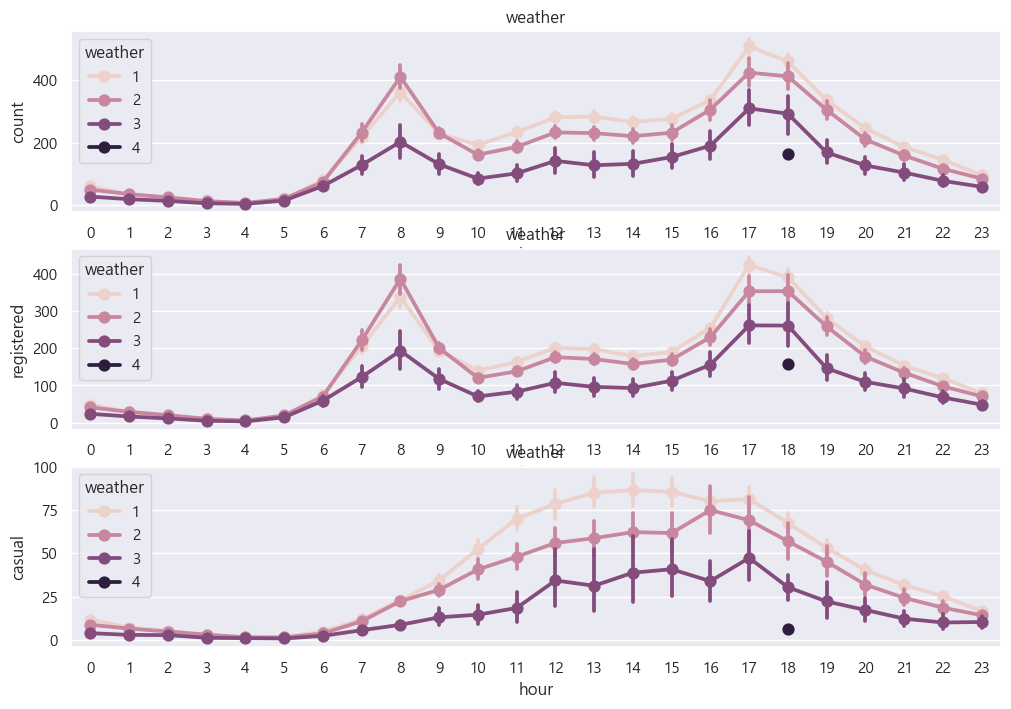

In [36]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8)  )

sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=axes[0])
axes[0].set(title="weather")

sns.pointplot(data=train, x='hour', y='registered', hue='weather', ax=axes[1])
axes[1].set(title="weather")

sns.pointplot(data=train, x='hour', y='casual', hue='weather', ax=axes[2])
axes[2].set(title="weather")

plt.show()

In [37]:
train[train['weather']==4]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
rdate,,,,,,,,,,,,,,,,
2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0


In [38]:
test[test['weather']==4]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
rdate,,,,,,,,,,,,,
2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028,2011,1,26,16,2
2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980,2012,1,21,1,5


## 강한 상관관계 
* holiday, workingday : 관계
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday

In [39]:
train[['holiday', 'workingday']].value_counts()

holiday  workingday
0        1             7412
         0             3163
1        0              311
Name: count, dtype: int64

<pre>
holiday  workingday    day_type
0           ,1        -- 0
0           ,0        -- 1
1           ,0        -- 2

### day_type : 파생피쳐

#### 방법1) loc[]

In [40]:
traincp = train.copy()

In [41]:
traincp['day_type'] = 0
traincp.loc[  (traincp['holiday']==0) & (traincp['workingday']==1) , 'day_type'] = 0
traincp.loc[  (traincp['holiday']==0) & (traincp['workingday']==0) , 'day_type'] = 1
traincp.loc[  (traincp['holiday']==1) & (traincp['workingday']==0) , 'day_type'] = 2

In [42]:
traincp.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,day_type
rdate,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,1


#### 방법2) np.where(조건절, 참,  거짓)
* decode(deptno,    10,1    ,20,2    , 3)
* decode(deptno,10   ,1, 99)

In [43]:
traincp['day_type2'] = 0
traincp['day_type2'] = np.where( (traincp['holiday']==0) & (traincp['workingday']==1)  , 0,  traincp['day_type2'])
traincp['day_type2'] = np.where( (traincp['holiday']==0) & (traincp['workingday']==0)  , 1,  traincp['day_type2'])
traincp['day_type2'] = np.where( (traincp['holiday']==1) & (traincp['workingday']==0)  , 2,  traincp['day_type2'])

In [44]:
traincp['day_type2'].isna().sum()

np.int64(0)

In [45]:
traincp.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,day_type,day_type2
rdate,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,1,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,1,1


#### 방법3) lambda

In [46]:
traincp['day_type3'] = np.nan

def myfunc(traincp):
    day_type=0
    if (traincp['holiday']==0) and (traincp['workingday']==1) :
        day_type=0
    elif (traincp['holiday']==0) and (traincp['workingday']==0) :
        day_type=1    
    elif (traincp['holiday']==1) and (traincp['workingday']==0) :
        day_type=2
    return  day_type
    
traincp['day_type3'] = traincp.apply(lambda df : myfunc(df), axis=1)

In [47]:
traincp['day_type3'].isna().sum()

np.int64(0)

In [48]:
traincp.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,day_type,day_type2,day_type3
rdate,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,1,1,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,1,1,1


### 시각화

In [49]:
train['day_type'] = 0
train.loc[  (train['holiday']==0) & (train['workingday']==1) , 'day_type'] = 0  #평일
train.loc[  (train['holiday']==0) & (train['workingday']==0) , 'day_type'] = 1  #주말
train.loc[  (train['holiday']==1) & (train['workingday']==0) , 'day_type'] = 2  #공휴일

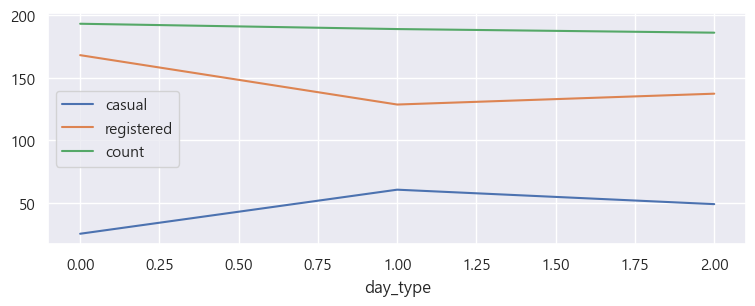

In [50]:
g = train.groupby('day_type')[['casual', 'registered', 'count']]
(g.sum() / g.count()).plot(figsize=(9,3))
plt.show()

In [51]:
# g = train[train['day_type']==0].groupby("hour")[['casual', 'registered', 'count']].mean()
# g.plot(figsize=(8,3))
# plt.show()

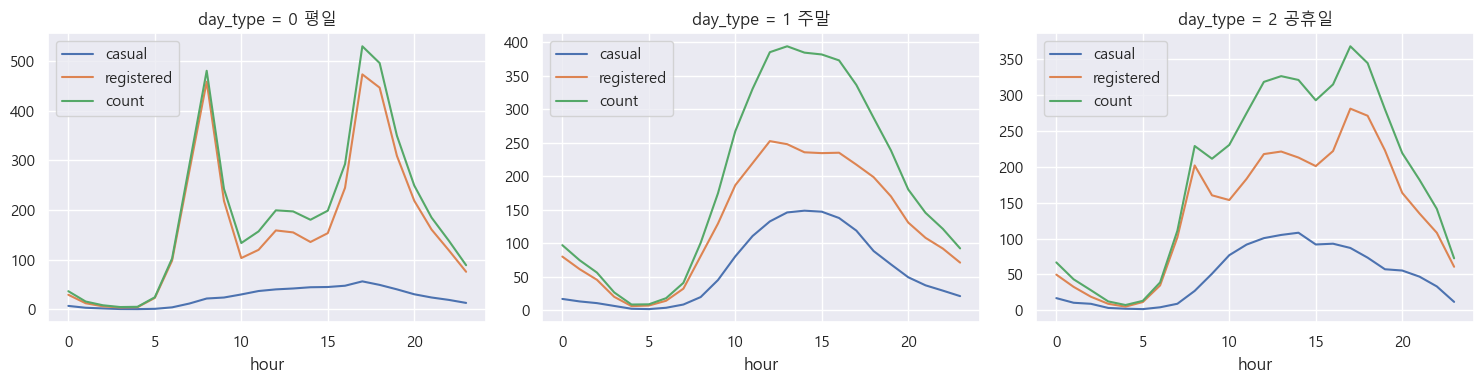

In [52]:

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

g0 = train[train['day_type']==0].groupby("hour")[['casual','registered','count']].mean()
g0.plot(ax=axes[0], title='day_type = 0 평일')

g1 = train[train['day_type']==1].groupby("hour")[['casual','registered','count']].mean()
g1.plot(ax=axes[1], title='day_type = 1 주말')

g2 = train[train['day_type']==2].groupby("hour")[['casual','registered','count']].mean()
g2.plot(ax=axes[2], title='day_type = 2 공휴일')

plt.tight_layout()
plt.show()

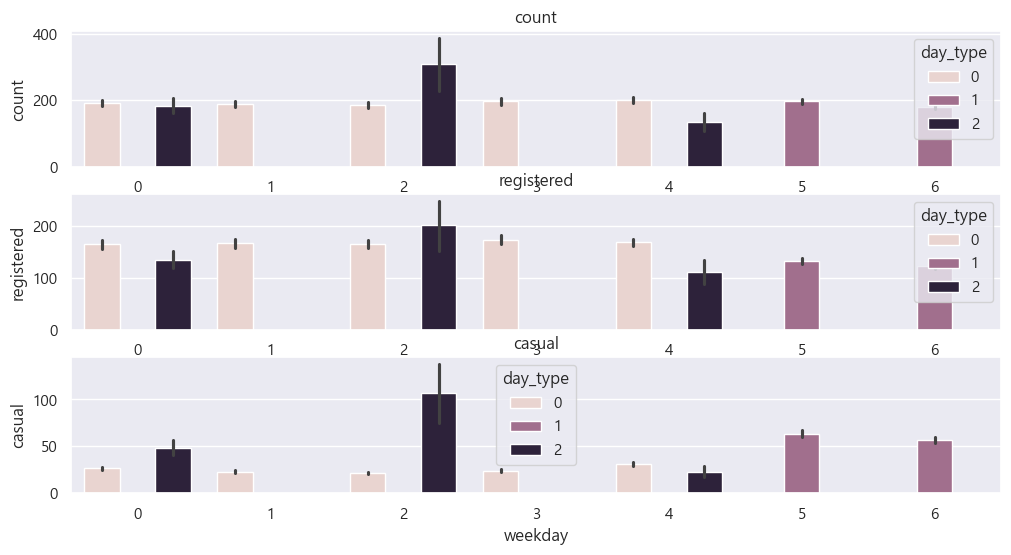

In [53]:
plt.figure(figsize=(12,6))
#  # 월=0 ~ 일=6
ax1 = plt.subplot(3,1,   1)
ax1.set_title("count")
sns.barplot(data=train, x="weekday", y="count", hue="day_type", ax=ax1)

ax2 = plt.subplot(3,1,   2)
ax2.set_title("registered")
sns.barplot(data=train, x="weekday", y="registered", hue="day_type", ax=ax2)

ax3 = plt.subplot(3,1,   3)
ax3.set_title("casual")
sns.barplot(data=train, x="weekday", y="casual", hue="day_type", ax=ax3)


plt.show()

* 2012-07-04 : 자전거 대여수는 이상치로 보인다
* Big Bay Boom: 미국 캘리포니아 샌디에이고에서 매년 7월 4일 열리는 대규모 독립기념일 불꽃놀이 행사.

In [54]:
train.loc[  (train['weekday']==2) & (train['day_type']==2)  , 'casual']

rdate
2012-07-04 00:00:00     19
2012-07-04 01:00:00     27
2012-07-04 02:00:00     27
2012-07-04 03:00:00      9
2012-07-04 04:00:00      5
2012-07-04 05:00:00      5
2012-07-04 06:00:00      9
2012-07-04 07:00:00     10
2012-07-04 08:00:00     43
2012-07-04 09:00:00     90
2012-07-04 10:00:00    143
2012-07-04 11:00:00    164
2012-07-04 12:00:00    164
2012-07-04 13:00:00    177
2012-07-04 14:00:00    190
2012-07-04 15:00:00    155
2012-07-04 16:00:00    163
2012-07-04 17:00:00    161
2012-07-04 18:00:00    159
2012-07-04 19:00:00    177
2012-07-04 20:00:00    237
2012-07-04 21:00:00    222
2012-07-04 22:00:00    175
2012-07-04 23:00:00     31
Name: casual, dtype: int64

# 전처리 & 가공

## 이상치(outlier)

In [55]:
# 'season', 'holiday', 'workingday','weather', 'temp','humidity', 'windspeed'
#  'holiday', 'workingday','month', 'hour', 'weekday' 

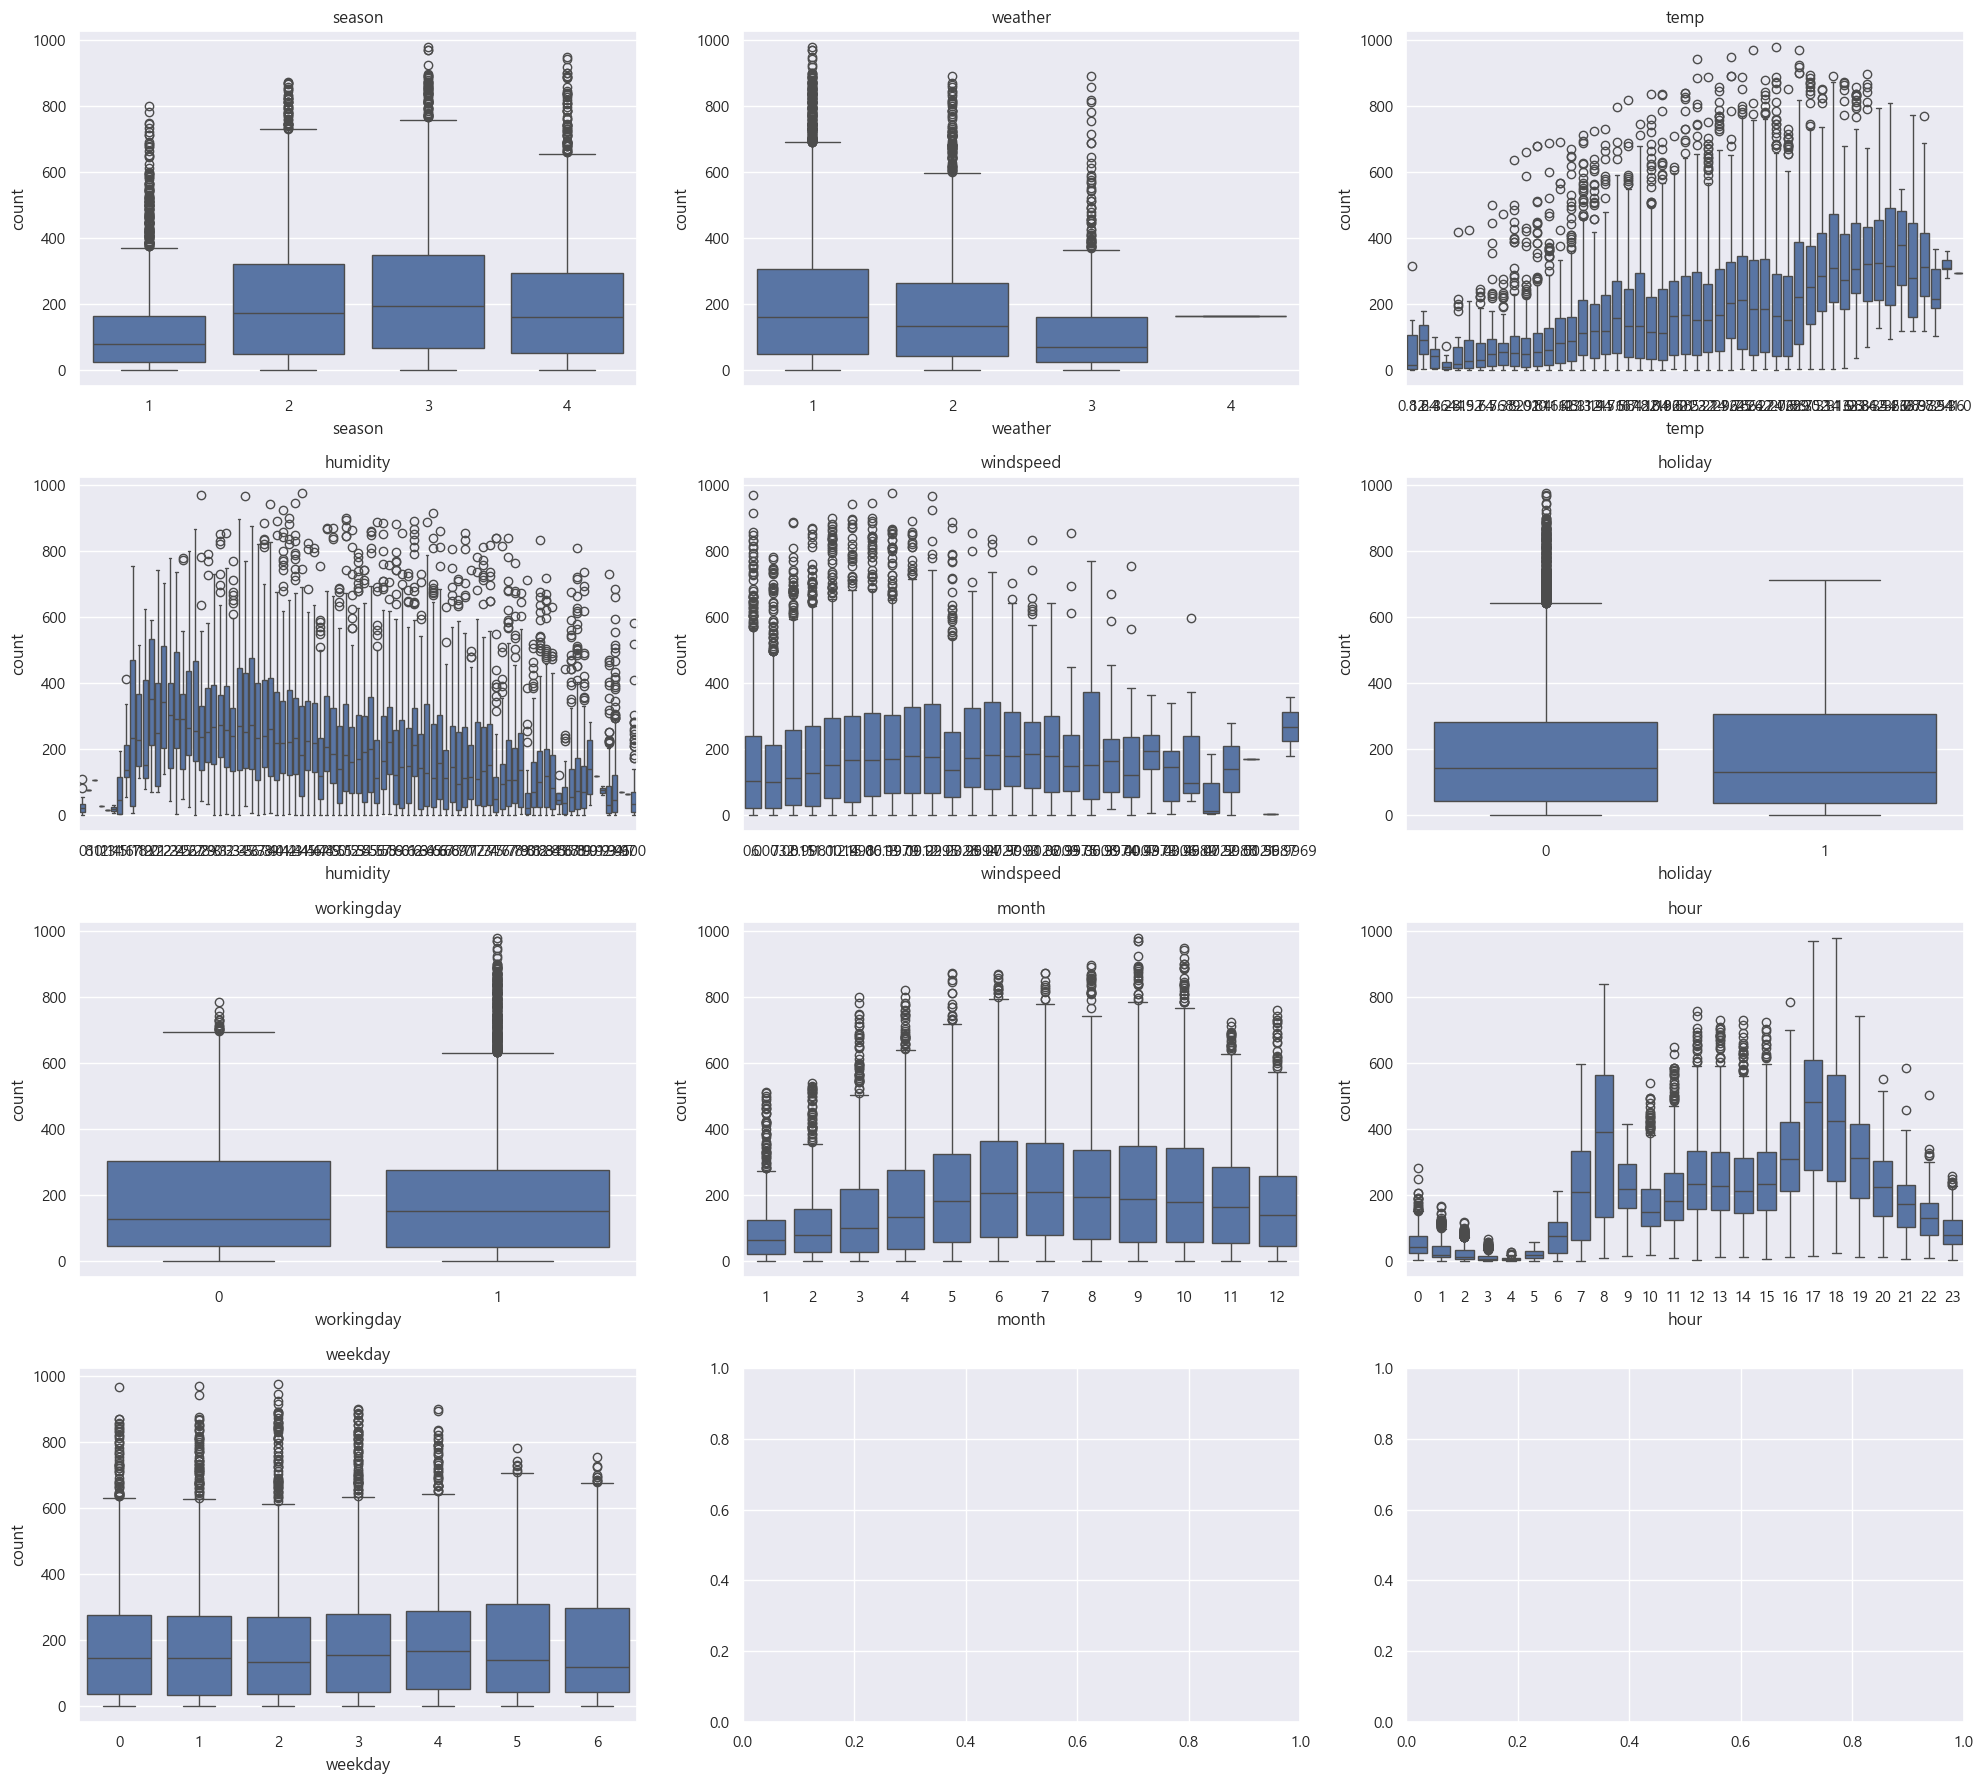

In [56]:
fig, axes = plt.subplots(4, 3, figsize=(20, 18)  )
col_list = ['season', 'weather', 'temp','humidity', 'windspeed','holiday', 'workingday','month', 'hour', 'weekday']
for i, col in enumerate(col_list) : 
    r = i//3
    c = i%3
    axes[r][c].set_title(col)
    sns.boxplot(data=train, x=col, y='count', ax=axes[r][c])
    
plt.tight_layout()
plt.show()

### <b>IQR(Inter Quantile Range) ★★

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FboDTe4%2FbtqHP3beJxg%2FAAAAAAAAAAAAAAAAAAAAABdo4TNnC6MtsDMqFj1Xci8I7eLAzuH6fG62dYMqGtGA%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1769871599%26allow_ip%3D%26allow_referer%3D%26signature%3D25ACydqfMcpxOzUq4P38X2EGJ9Y%253D" width=600>

In [57]:
print( train['windspeed'].quantile(0.25) )
print( train['windspeed'].quantile(0.5)  )
print( train['windspeed'].quantile(0.75) ) 
print("--------")    
print( train['windspeed'].quantile( [0.25, 0.5, 0.75]) ) 

7.0015
12.998
16.9979
--------
0.25     7.0015
0.50    12.9980
0.75    16.9979
Name: windspeed, dtype: float64


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/960px-Boxplot_vs_PDF.svg.png" width=600 height="200">

In [58]:
Q1 =  train['windspeed'].quantile(0.25)
Q3 =  train['windspeed'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - (1.7*IQR)
upper_limit = Q3 + (1.7*IQR)
print( lower_limit, upper_limit)

-9.99238 33.991780000000006


In [59]:
train[  (train['windspeed'] <lower_limit) |  (train['windspeed'] >upper_limit)  ] .head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,day_type
rdate,,,,,,,,,,,,,,,,,
2011-01-08 17:00:00,1,0,0,1,6.56,6.06,37,36.9974,5,64,69,2011,1,8,17,5,1
2011-01-09 09:00:00,1,0,0,1,4.92,3.79,46,35.0008,0,19,19,2011,1,9,9,6,1


### 모델 사용(windspeed 0채우기)

In [60]:
len ( train[train['windspeed']==0] ), train.shape

(1313, (10886, 17))

#### bfill(), ffill()

In [61]:
#train['windspeed'] = train['windspeed'].bfill()

#### 모델 예측값 사용

In [62]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour', 'weekday', 'day_type'],
      dtype='object')

In [63]:
WS_TEST = train [train['windspeed'] == 0] [['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'year',
       'month', 'day', 'hour', 'weekday']]
WS_TEST.shape

(1313, 12)

In [64]:
WS_TRAIN_X = train [train['windspeed'] != 0] [['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'year','month', 'day', 'hour', 'weekday']]
WS_TRAIN_y = train [train['windspeed'] != 0] ['windspeed']
WS_TRAIN_X.shape, WS_TRAIN_y.shape

((9573, 12), (9573,))

```python
class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, tol=1e-06, n_jobs=None, positive=False)

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(WS_TRAIN_X, WS_TRAIN_y)
pred = model.predict(WS_TEST)
WS_TEST['windspeed'] = pred

In [66]:
WS_TEST['windspeed'].head()

rdate
2011-01-01 00:00:00    10.607949
2011-01-01 01:00:00    10.722611
2011-01-01 02:00:00    10.763212
2011-01-01 03:00:00    11.529895
2011-01-01 04:00:00    11.570496
Name: windspeed, dtype: float64

In [67]:
WS_TEST['windspeed'].index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 06:00:00',
               '2011-01-01 07:00:00', '2011-01-01 08:00:00',
               '2011-01-01 09:00:00', '2011-01-03 19:00:00',
               ...
               '2012-12-17 02:00:00', '2012-12-17 03:00:00',
               '2012-12-17 04:00:00', '2012-12-17 05:00:00',
               '2012-12-17 09:00:00', '2012-12-17 12:00:00',
               '2012-12-17 15:00:00', '2012-12-18 08:00:00',
               '2012-12-18 22:00:00', '2012-12-19 00:00:00'],
              dtype='datetime64[ns]', name='rdate', length=1313, freq=None)

In [68]:
train.loc[  WS_TEST['windspeed'].index ,  'windspeed'] = pred
train['windspeed'].head(10)

rdate
2011-01-01 00:00:00    10.607949
2011-01-01 01:00:00    10.722611
2011-01-01 02:00:00    10.763212
2011-01-01 03:00:00    11.529895
2011-01-01 04:00:00    11.570496
2011-01-01 05:00:00     6.003200
2011-01-01 06:00:00    10.925615
2011-01-01 07:00:00    10.103520
2011-01-01 08:00:00    11.732899
2011-01-01 09:00:00    11.883842
Name: windspeed, dtype: float64

## <font color=red size=6><b>정규화★★★★★★★★★★★★

<pre><font color=red size=4><b>
Regularization 
    * 모델 복잡도를 제어 --> 과적합(Overfitting) 방지 --> 모델의 일반화
    * 일부를 희생 --> 예측 성능을 높이는 데 초점
    
Normalization == 스케일링(Scaling)
    * 데이터의 스케일을 조정(0~1) --> 피쳐의 영향력을 줄임 -->  모델 학습 안정화
    * 0~1 사이의 값으로 변환

### 스케일링

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

``` python
class sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
class sklearn.preprocessing.RobustScaler(*, with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True, unit_variance=False)
class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)[source]


#### <b><font size=6 color=red>MinMaxScaler()
* 최소(0) ~ 최대(1) 범위로 축소

In [70]:
col_list = ['temp','count'] #, 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
mm_scaler = MinMaxScaler()
mm_scaler.fit(train[col_list])
scaler_res = mm_scaler.transform(train[col_list])
scaler_res

array([[0.2244898 , 0.01536885],
       [0.20408163, 0.03995902],
       [0.20408163, 0.0317623 ],
       ...,
       [0.32653061, 0.17110656],
       [0.32653061, 0.13114754],
       [0.30612245, 0.08913934]], shape=(10886, 2))

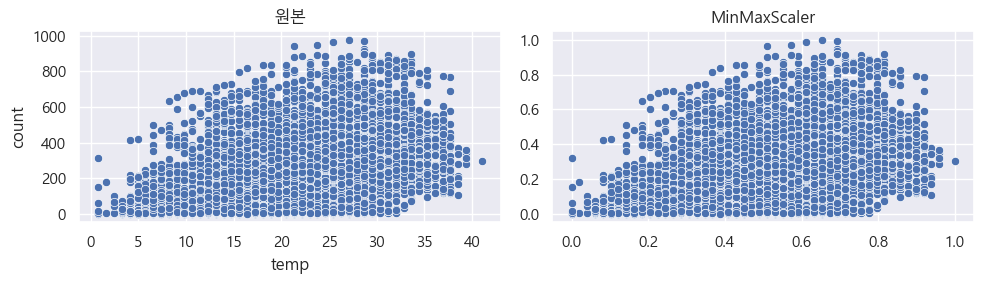

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.scatterplot(x=train['temp'], y=train['count'], ax=axes[0])
axes[0].set_title("원본")
sns.scatterplot(x=scaler_res[:, 0], y=scaler_res[:, 1], ax=axes[1])
axes[1].set_title("MinMaxScaler")
plt.tight_layout()
plt.show()

In [72]:
col_list = ['temp','count', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
mm_scaler = MinMaxScaler()
mm_scaler.fit(train[col_list])
scaler_res = mm_scaler.transform(train[col_list])
scaler_res

array([[0.2244898 , 0.01536885, 0.30506768, ..., 0.00817439, 0.01467269,
        0.01536885],
       [0.20408163, 0.03995902, 0.28806354, ..., 0.02179837, 0.03611738,
        0.03995902],
       [0.20408163, 0.0317623 , 0.28806354, ..., 0.01362398, 0.03047404,
        0.0317623 ],
       ...,
       [0.32653061, 0.17110656, 0.33896409, ..., 0.01089918, 0.18510158,
        0.17110656],
       [0.32653061, 0.13114754, 0.3728605 , ..., 0.03269755, 0.13205418,
        0.13114754],
       [0.30612245, 0.08913934, 0.35585636, ..., 0.01089918, 0.09480813,
        0.08913934]], shape=(10886, 8))

#### <b>원수치로 돌려놓기
* 타켓 피쳐를 스케일링 했다면 학습 이후 원수치로 돌려놓기

In [73]:
mm_scaler.inverse_transform(scaler_res)

array([[  9.84 ,  16.   ,  14.395, ...,   3.   ,  13.   ,  16.   ],
       [  9.02 ,  40.   ,  13.635, ...,   8.   ,  32.   ,  40.   ],
       [  9.02 ,  32.   ,  13.635, ...,   5.   ,  27.   ,  32.   ],
       ...,
       [ 13.94 , 168.   ,  15.91 , ...,   4.   , 164.   , 168.   ],
       [ 13.94 , 129.   ,  17.425, ...,  12.   , 117.   , 129.   ],
       [ 13.12 ,  88.   ,  16.665, ...,   4.   ,  84.   ,  88.   ]],
      shape=(10886, 8))

In [74]:
traincp = train[['season', 'holiday', 'workingday', 'weather','year','month', 'day', 'hour', 'weekday', 'day_type']].copy()
traincp.head(1)

,season,holiday,workingday,weather,year,month,day,hour,weekday,day_type
rdate,,,,,,,,,,
2011-01-01,1,0,0,1,2011,1,1,0,5,1


In [75]:
traincp[col_list] = scaler_res
traincp.head(2)

,season,holiday,workingday,weather,year,month,day,hour,weekday,day_type,temp,count,atemp,humidity,windspeed,casual,registered
rdate,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,2011,1,1,0,5,1,0.224490,0.015369,0.305068,0.81,0.090300,0.008174,0.014673
2011-01-01 01:00:00,1,0,0,1,2011,1,1,1,5,1,0.204082,0.039959,0.288064,0.80,0.092549,0.021798,0.036117


<font color=red>★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

#### <b><font size=6 color=red>StandardScaler()
* 평균 0, 표준편차 1인 범위로 축소

<b><font size=4 color=red>Z-값(Z-score, 표준점수) <br>
   값이 평균으로부터 표준편차의 몇 배만큼 떨어져 있는지를 나타내는 수치<br>
   평균 0, 표준편차 1인 표준정규분포 <br>
    $ z=\frac{x-\mu }{\sigma } $  =  오차(실값-평균)이 를 표준편차로 표준화

<font color=red>★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

#### <b><font size=6 color=red>RobustScaler()
* 중앙값 기준으로 IQR  1사분위(0.25) ~ 3사분위(0.75) 범위로 축소

In [76]:
col_list = ['temp','count', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
scaler_list = [StandardScaler() , MinMaxScaler(), RobustScaler()]
for scaler in scaler_list:
    scaler.fit(train[col_list])
    res = scaler.transform(train[col_list])
    print(scaler.__class__.__name__, res[:2])

StandardScaler [[-1.33366069 -0.9692938  -1.09273697  0.99321305 -0.5563379  -0.66099193
  -0.94385353 -0.9692938 ]
 [-1.43890721 -0.83679677 -1.18242083  0.94124921 -0.53931539 -0.56090822
  -0.81805246 -0.83679677]]
MinMaxScaler [[0.2244898  0.01536885 0.30506768 0.81       0.09030036 0.00817439
  0.01467269 0.01536885]
 [0.20408163 0.03995902 0.28806354 0.8        0.09254891 0.02179837
  0.03611738 0.03995902]]
RobustScaler [[-0.86666667 -0.53305785 -0.68391803  0.63333333 -0.25875088 -0.31111111
  -0.56451613 -0.53305785]
 [-0.93333333 -0.4338843  -0.73671414  0.6        -0.2463374  -0.2
  -0.46236559 -0.4338843 ]]


# 학습 &  평가
* https://scikit-learn.org/stable/modules/model_evaluation.html
* MSE : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

<pre><font color=red size=3><b> 
MSE(mean_squared_error) : 잔차(실제값-예측값) 제곱을  평균(다합한 후 데이터갯수로 나눔)
분산(variance)          : 오차(실제값-평균)   제곱을  평균(그것을 모두 더한 후 전체 개수로 나눔)

``` python
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, tol=1e-06, n_jobs=None, positive=False)

sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')


## 1차 우선 점수만 보자

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

y = train['count']
X = train.drop(['count','casual','registered'] , axis=1)
X80,X20,   y80,y20 =  train_test_split(X, y, test_size=0.2, random_state=4548)
print(X80.shape, X20.shape,   y80.shape,y20.shape)

(8708, 14) (2178, 14) (8708,) (2178,)


In [78]:
lr = LinearRegression()
lr.fit(X80, y80)
pred = lr.predict(X20)
score = mean_squared_error(y20, pred)
print( np.sqrt(score) )
print(y20[:10])
print(pred[:10])

145.71446160265197
rdate
2012-02-13 03:00:00      1
2011-08-13 00:00:00     84
2012-09-18 04:00:00      7
2011-09-08 06:00:00     56
2011-03-01 23:00:00     25
2011-04-01 18:00:00    241
2011-11-14 22:00:00    113
2011-09-16 11:00:00    179
2012-01-03 22:00:00     33
2011-07-07 02:00:00      8
Name: count, dtype: int64
[ 40.77015701 145.48017224 156.03000635  79.76874466 131.92415713
 171.77427656 305.50804658 189.36578758 190.73719089  63.97123991]


## 2차 점수(원리이해)
* 아웃라이어
* 정규화(스케일링)

In [79]:
print(train.shape)
train.head(2)

(10886, 17)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,day_type
rdate,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,10.607949,3,13,16,2011,1,1,0,5,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,10.722611,8,32,40,2011,1,1,1,5,1


In [80]:
# ================================ train,test 8:2 분리 =========================
y = train['count']
X = train.drop(['count','casual','registered'] , axis=1)
X80,X20,   y80,y20 =  train_test_split(X, y, test_size=0.2, random_state=4548)
print(X80.shape, X20.shape,   y80.shape,y20.shape)

(8708, 14) (2178, 14) (8708,) (2178,)


In [81]:
# ============================= 정규화(X) ====================
col_list = ['temp', 'atemp', 'humidity', 'windspeed']
scalerX = StandardScaler()       # (8708, 14)
scalerX.fit(X80[col_list])   
res80 = scalerX.transform(X80[col_list])
res20 = scalerX.transform(X20[col_list])
res80.shape , res20.shape

((8708, 4), (2178, 4))

In [82]:
y80.shape, np.array(y80).reshape(-1,1) 

((8708,),
 array([[327],
        [283],
        [220],
        ...,
        [ 69],
        [ 33],
        [ 21]], shape=(8708, 1)))

In [83]:
# =============== 정규화(y80: 0.32,0.23)   (pred: 0.32,0.23) ---원복--- (y20:100..200) ==============
scalerY = StandardScaler()        # (8708,   )
scalerY.fit(np.array(y80).reshape(-1,1) )   # 1차 --> 2차 
scalerY80 = scalerY.transform(np.array(y80).reshape(-1,1))

print( scalerY80.reshape(-1).shape  )

(8708,)


In [84]:
scalerY80[:10]

array([[ 0.75756066],
       [ 0.51300791],
       [ 0.16285284],
       [-0.40962292],
       [-0.87093834],
       [-0.05946785],
       [ 0.12950473],
       [-0.15395414],
       [ 1.60237926],
       [ 1.73577167]])

In [85]:
scalerX80 = X80[['season', 'holiday', 'workingday', 'weather','year','month', 'day', 'hour', 'weekday', 'day_type']].copy()
scalerX20 = X20[['season', 'holiday', 'workingday', 'weather','year','month', 'day', 'hour', 'weekday', 'day_type']].copy()

scalerX80[col_list] = res80
scalerX20[col_list] = res20
scalerX80.head(2)

,season,holiday,workingday,weather,year,month,day,hour,weekday,day_type,temp,atemp,humidity,windspeed
rdate,,,,,,,,,,,,,,
2012-02-02 19:00:00,1,0,1,1,2012,2,2,19,3,0,-0.590973,-0.459207,-0.983341,3.068400
2012-04-10 13:00:00,2,0,1,1,2012,4,10,13,1,0,0.147665,0.167586,-2.027416,-0.500692


In [86]:
scalerX20.head(2)

,season,holiday,workingday,weather,year,month,day,hour,weekday,day_type,temp,atemp,humidity,windspeed
rdate,,,,,,,,,,,,,,
2012-02-13 03:00:00,1,0,1,1,2012,2,13,3,0,0,-1.962729,-1.891201,-0.409099,-1.09554
2011-08-13 00:00:00,3,0,0,1,2011,8,13,0,5,1,0.991822,0.973378,-0.565711,-1.09554


In [87]:
 #145.7 -->  0.80

In [88]:
# ================================학습 & 평가 ==================================
lr = LinearRegression()
lr.fit(scalerX80, scalerY80)
scaler_pred = lr.predict(scalerX20)
pred = scalerY.inverse_transform(scaler_pred)

print(y20.shape, y20[:3])
print(scaler_pred[:3])
print(np.array(pred).reshape(-1).shape, pred[:3])

(2178,) rdate
2012-02-13 03:00:00     1
2011-08-13 00:00:00    84
2012-09-18 04:00:00     7
Name: count, dtype: int64
[[-0.83330969]
 [-0.25132964]
 [-0.19269348]]
(2178,) [[ 40.77015701]
 [145.48017224]
 [156.03000635]]


In [89]:
mse  = mean_squared_error(y20, pred)
print(np.sqrt(mse))

145.71446160265117


## 파이프라인

In [90]:
# from sklearn.pipeline import Pipeline

# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('lr', LinearRegression())
# ])

# pipeline.fit(X80, y80)

In [91]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

pipeline.fit(X80, y80)

,steps,"[('scaler', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [92]:
scaler_pred = lr.predict(scalerX20)
pred = scalerY.inverse_transform(scaler_pred)

print(y20.shape, y20[:3])
print(scaler_pred[:3])
mse  = mean_squared_error(y20, pred)
print(np.sqrt(mse))

(2178,) rdate
2012-02-13 03:00:00     1
2011-08-13 00:00:00    84
2012-09-18 04:00:00     7
Name: count, dtype: int64
[[-0.83330969]
 [-0.25132964]
 [-0.19269348]]
145.71446160265117
